## German Credit Analysis

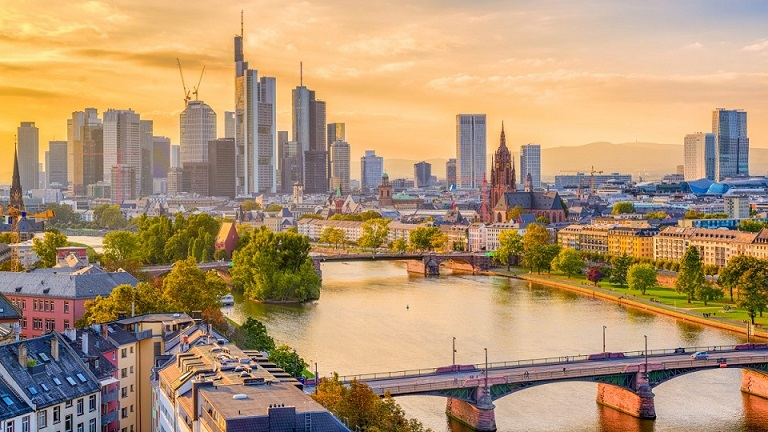

In this data analysis, we will explore the behavior of German bank customers. Questions like what was the purpose of the credit loans, what are the applicants' incomes, what percentage of defaults, and many other questions will be answered through our in-depth analysis of German credit recipients.

### Importing necessary libraries and loading data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style("darkgrid")
sns.color_palette("gnuplot2")
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("german-credit.csv", index_col=0)

### Exploring data

**Columns List**

- Age (numeric)

- Sex (text: male, female)

- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

- Housing (text: own, rent, or free)

- Saving accounts (text - little, moderate, quite rich, rich)

- Checking account (numeric, in DM - Deutsch Mark)

- Credit amount (numeric, in DM)

- Duration (numeric, in month)

- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

- default (1 - bad, 0 - good)

In [2]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [3]:
df.shape

(1000, 10)

Total record in dataset = 1000

Columns in the dataset = 10

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   default           1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 85.9+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
default               0
dtype: int64

In [7]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_info')

In [8]:
df['Checking account'] = df['Checking account'].fillna('no_info') 

There is no duplicated values. Only 'Saving accounts' (183) and 'Checking account' (394) have NaN values. I made a technical replacement of NaN values.

In [9]:
df[['Age', 'Credit amount', 'Duration', 'default']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


Summary statistics of data.

### Analysis by Age Groups

In [10]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,no_info,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


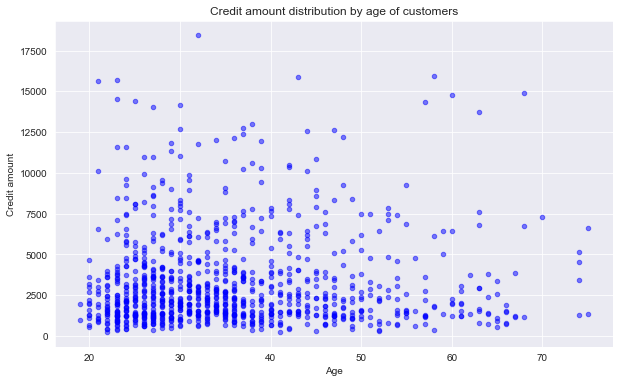

In [11]:
df.plot(x='Age', y='Credit amount', kind='scatter', figsize=(10, 6), color="blue", alpha=0.5);
plt.title("Credit amount distribution by age of customers");

In [12]:
df['age_groups'] = pd.qcut(df['Age'], 5, precision=1)

We've didvided customers into 5 age categories:  

    18.9 - 26.0; 
    26.0 - 30.0; 
    30.0 - 36.0; 
    36.0 - 45.0; 
    45.0 - 75.0

In [13]:
df.groupby('age_groups')['default'].agg(['count','mean'])

,count,mean
age_groups,,
"(18.9, 26.0]",240,0.391667
"(26.0, 30.0]",171,0.315789
"(30.0, 36.0]",216,0.259259
"(36.0, 45.0]",187,0.262032
"(45.0, 75.0]",186,0.252688


Customers between 19 - 26 years old are the biggest group and they have more 'default's than other age groups.

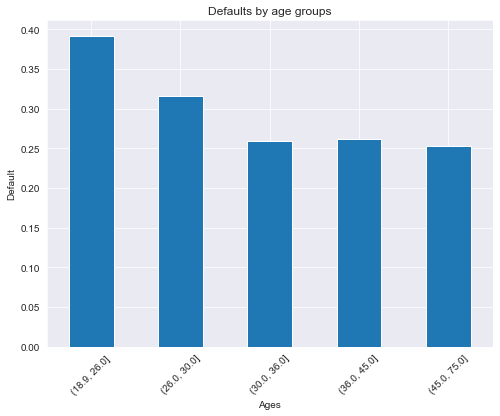

In [14]:
ages = df.groupby('age_groups')['default'].mean()
ages.plot(ylim=0, kind = "bar", figsize = (8, 6))
plt.title("Defaults by age groups")
plt.xlabel("Ages")
plt.ylabel("Default")
plt.xticks(rotation=45);

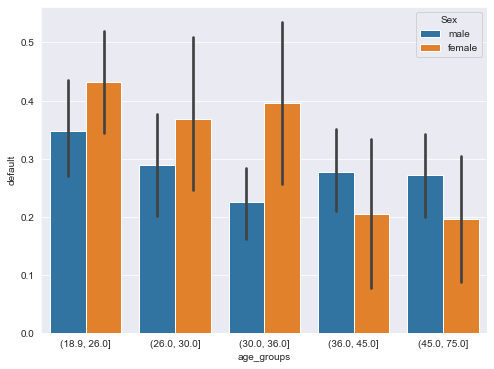

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='age_groups', y='default', hue='Sex', data=df);

With increasing age, the percentage of 'default's decreases!

### Analysis by Gender 

In [16]:
df.pivot_table(index = 'Sex', values = 'default', aggfunc= ['count', 'mean'])

,count,mean
,default,default
Sex,,
female,310,0.351613
male,690,0.276812


In our dataset number of males is two times more than females. And the percentage of females defaults is higher!

In [17]:
df.groupby('Sex')['Age'].agg(['count','mean','median'])

,count,mean,median
Sex,,,
female,310,32.803226,29.0
male,690,36.778261,35.0


Also, females in this dataset are younger. 

In [18]:
df['age_group2'] = pd.qcut(df['Age'], 3, precision=1)

We've created new 3 age categories:  

    18.9 - 28.0; 
    28.0 - 38.0; 
    38.0 - 75.0.

In [19]:
df.groupby(['age_group2','Sex'])['default'].agg(['count','mean'])

count      mean
age_group2   Sex                    
(18.9, 28.0] female    154  0.409091
             male      180  0.327778
(28.0, 38.0] female     83  0.385542
             male      263  0.235741
(38.0, 75.0] female     73  0.191781
             male      247  0.283401

Most females that applied for credit loans were younger than 38 and repaid loans worse.  On the contrary, females above 38 repaid credit loans better than males - 19% of default rate.

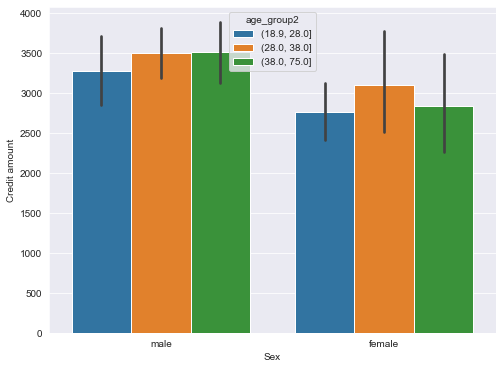

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(y='Credit amount', x='Sex', hue='age_group2', data=df);

### Jobs

In [21]:
job_dict = {0:"unskilled and non-resident",
            1:"unskilled and resident",
            2:"skilled",
            3: "highly skilled"}

In [22]:
df['Job'] = df['Job'].map(job_dict)

In [23]:
df.groupby('Job')['default'].agg(['count','mean'])

,count,mean
Job,,
highly skilled,148,0.344595
skilled,630,0.295238
unskilled and non-resident,22,0.318182
unskilled and resident,200,0.280000


It is strange that highly skilled customers have the highest default rate 34%. Let's check the age of customers in these groups.

In [24]:
df.groupby(['Job','age_group2'])['default'].agg(['count','mean'])

count      mean
Job                        age_group2                   
highly skilled             (18.9, 28.0]     21  0.523810
                           (28.0, 38.0]     68  0.220588
                           (38.0, 75.0]     59  0.423729
skilled                    (18.9, 28.0]    240  0.350000
                           (28.0, 38.0]    220  0.268182
                           (38.0, 75.0]    170  0.252941
unskilled and non-resident (18.9, 28.0]      9  0.555556
                           (28.0, 38.0]      4  0.250000
                           (38.0, 75.0]      9  0.111111
unskilled and resident     (18.9, 28.0]     64  0.343750
                           (28.0, 38.0]     54  0.351852
                           (38.0, 75.0]     82  0.182927

Young people in the 'highly skilled' and 'skilled' groups negatively affect the level of default.

Anyway, the highest default rate is 56% and it belongs to young people of 'unskilled and non-resident' group.	

In [25]:
df.groupby('Job')['Credit amount'].agg(['count','mean','median'])

,count,mean,median
Job,,,
highly skilled,148,5435.493243,4459.0
skilled,630,3070.965079,2324.0
unskilled and non-resident,22,2745.136364,1416.0
unskilled and resident,200,2358.520000,1622.0


But it seems that the main influence is exerted by the size of the credit loan! In the 'highly skilled' and 'skilled', the credit amount is higher than in 'unskilled'. 

We have to check the impact of credit loan size on default in general.

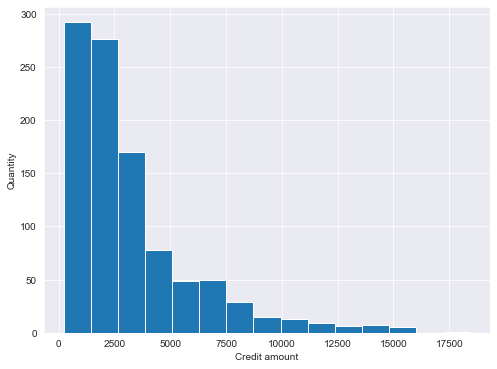

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df['Credit amount'], bins=15)
plt.xlabel("Credit amount")
plt.ylabel("Quantity");

Around 80% of customers have credit loans less than 4720 DM.

In [27]:
df['credit_amount_group'] = pd.qcut(df['Credit amount'], 5, precision=2)

We created 5 credit amount categories:
    
    249.99 - 1262.0;
    1262.0 - 1906.8;
    1906.8 - 2852.4;
    2852.4 - 4720.0;
    4720.0 - 18424.0

In [28]:
df.groupby('credit_amount_group')['default'].agg(['count','mean'])

,count,mean
credit_amount_group,,
"(249.99, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


The larger size of the credit loan, the higher the default rate.

In [29]:
df.groupby(['credit_amount_group', 'Sex'])['default'].agg(['count','mean'])

count      mean
credit_amount_group Sex                    
(249.99, 1262.0]    female     80  0.362500
                    male      121  0.264463
(1262.0, 1906.8]    female     71  0.309859
                    male      128  0.203125
(1906.8, 2852.4]    female     53  0.301887
                    male      147  0.258503
(2852.4, 4720.0]    female     58  0.275862
                    male      142  0.253521
(4720.0, 18424.0]   female     48  0.541667
                    male      152  0.388158

The credit loan amounts for male applicants are greater than the credit loan amounts of female customers.

<Figure size 576x432 with 0 Axes>

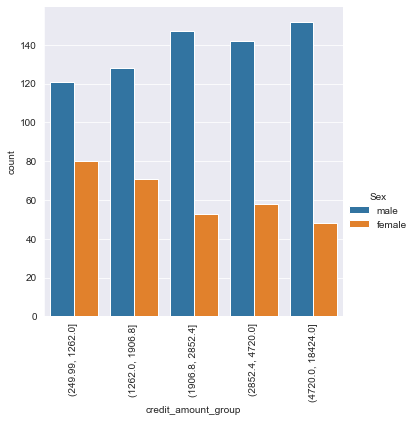

In [30]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df, kind='count', x='credit_amount_group', hue='Sex');
plt.xticks(rotation=90);

As we mentioned before, the number of male applicants clearly exceeds the number of women applicants.

### Wealth Analysis

In [31]:
df.groupby('Housing')['default'].agg(['count','mean'])

,count,mean
Housing,,
free,108,0.407407
own,713,0.260870
rent,179,0.391061


The house owners have much lower default rate - 26%.

In [32]:
df.groupby('Saving accounts', dropna=False)['default'].agg(['count', 'mean'])

,count,mean
Saving accounts,,
little,603,0.359867
moderate,103,0.330097
no_info,183,0.174863
quite rich,63,0.174603
rich,48,0.125000


Сustomers with a larger bank account pay their credit loan much earlier than others.

In [33]:
df.groupby('Checking account', dropna=False)['default'].agg(['count', 'mean'])

,count,mean
Checking account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


Besides, in 'Checking account' column the highest number of customers is in 'NaN' category - 394, and they have the lowest percentage of default. Unfortunately, we do not have any information on the status of their checking account.

In [34]:
(df.groupby(['Checking account', 'Sex'])
[['default', 'Credit amount']]
 .agg({'default':['count', 'mean'], 
       'Credit amount':['mean', 'median']}))

default           Credit amount        
                          count      mean          mean  median
Checking account Sex                                           
little           female      88  0.522727   2564.215909  1838.5
                 male       186  0.478495   3464.295699  2589.5
moderate         female      86  0.476744   3720.034884  2651.0
                 male       183  0.349727   3878.092896  2520.0
no_info          female     116  0.155172   2708.750000  1935.0
                 male       278  0.100719   3310.169065  2393.5
rich             female      20  0.200000   1616.050000  1400.5
                 male        43  0.232558   2438.860465  1925.0

Except for the 'rich' people group, in all groups, the default rate of males is lower than females rate.

### Duration of credit loans

In [35]:
df['Duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

The average duration of loans is 21 months, in 75% of cases the duration is less than 24 months.

In [36]:
df["Duration_periods"] = pd.qcut(df['Duration'], 4, precision=1)

We've divided "Duration" column into 4 categories:

    3.9  - 12.0; 
    12.0 - 18.0; 
    18.0 - 24.0;
    24.0 - 72.0

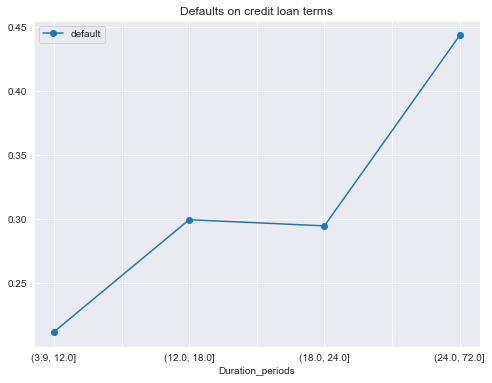

In [37]:
term = df.groupby('Duration_periods')['default'].agg("mean")
plt.figure(figsize=(8, 6))
term.plot(legend=True, marker='o')
plt.title("Defaults on credit loan terms");

In [38]:
df.groupby(['Duration_periods', "Sex"])['default'].agg(["count", "mean"])

count      mean
Duration_periods Sex                    
(3.9, 12.0]      female    118  0.262712
                 male      241  0.186722
(12.0, 18.0]     female     70  0.342857
                 male      117  0.273504
(18.0, 24.0]     female     67  0.358209
                 male      157  0.267516
(24.0, 72.0]     female     55  0.545455
                 male      175  0.411429

In [39]:
df.groupby(['Duration_periods', "Sex"])['default'].agg(["count", "mean"]).sort_values(by='mean', ascending=False)

count      mean
Duration_periods Sex                    
(24.0, 72.0]     female     55  0.545455
                 male      175  0.411429
(18.0, 24.0]     female     67  0.358209
(12.0, 18.0]     female     70  0.342857
                 male      117  0.273504
(18.0, 24.0]     male      157  0.267516
(3.9, 12.0]      female    118  0.262712
                 male      241  0.186722

Both males and females were more loyal to the bank if they received a credit loan for a period of less than 24 months. And as always, males have less default rate.

Before we've created new 3 age categories:

    18.9 - 28.0; 
    28.0 - 38.0; 
    38.0 - 75.0.
    
Now we'll check the effect of the duration of the loan in relation to the ages of the customers.

In [40]:
df.groupby(['Duration_periods', 'age_group2'])['default'].agg(["count", "mean"])

count      mean
Duration_periods age_group2                   
(3.9, 12.0]      (18.9, 28.0]    116  0.301724
                 (28.0, 38.0]    111  0.189189
                 (38.0, 75.0]    132  0.151515
(12.0, 18.0]     (18.9, 28.0]     71  0.309859
                 (28.0, 38.0]     66  0.287879
                 (38.0, 75.0]     50  0.300000
(18.0, 24.0]     (18.9, 28.0]     72  0.291667
                 (28.0, 38.0]     83  0.325301
                 (38.0, 75.0]     69  0.260870
(24.0, 72.0]     (18.9, 28.0]     75  0.586667
                 (28.0, 38.0]     86  0.313953
                 (38.0, 75.0]     69  0.449275

We see some correlation between long-term loans and default.

### Loan Purpose

In [41]:
df.groupby('Purpose')['default'].agg(['count','mean']).sort_values(by='count', ascending=False)

,count,mean
Purpose,,
car,337,0.314540
radio/TV,280,0.221429
furniture/equipment,181,0.320442
business,97,0.350515
education,59,0.389831
repairs,22,0.363636
domestic appliances,12,0.333333
vacation/others,12,0.416667


In most cases, customers applied for a credit loan for cars (337), radio/TV (280), and furniture/equipment (181) purposes.

In [42]:
df.groupby('Purpose')['default'].agg(['count','mean']).sort_values(by='mean', ascending=False)

,count,mean
Purpose,,
vacation/others,12,0.416667
education,59,0.389831
repairs,22,0.363636
business,97,0.350515
domestic appliances,12,0.333333
furniture/equipment,181,0.320442
car,337,0.314540
radio/TV,280,0.221429


Only Radio/TV (280 loans) purpose was less risky since it had the widest gap between good and bad risk (22% default).

In [43]:
df.groupby(['Purpose', 'Sex'])['default'].agg(['count','mean']).sort_values(by=['Sex','count'], ascending=False)

,,count,mean
Purpose,Sex,,
car,male,243,0.271605
radio/TV,male,195,0.220513
furniture/equipment,male,107,0.280374
business,male,78,0.346154
education,male,35,0.400000
repairs,male,17,0.352941
vacation/others,male,9,0.333333
domestic appliances,male,6,0.333333
car,female,94,0.425532


Females mostly used to apply for a credit loan to buy cars (94), radio/TV (85), and furniture and equipment (74). Males also had the same reasons for applying for a loan: cars (243), radio/TV (195), and furniture and equipment (107).

In [44]:
df.groupby(['Purpose', 'Sex'])['default'].agg(['count','mean']).sort_values(by=['Sex','mean'], ascending=False)

,,count,mean
Purpose,Sex,,
education,male,35,0.400000
repairs,male,17,0.352941
business,male,78,0.346154
domestic appliances,male,6,0.333333
vacation/others,male,9,0.333333
furniture/equipment,male,107,0.280374
car,male,243,0.271605
radio/TV,male,195,0.220513
vacation/others,female,3,0.666667


For males as well as for females Radio/TV purpose was less risky since it had 22% of bad risk only.

### Correlations

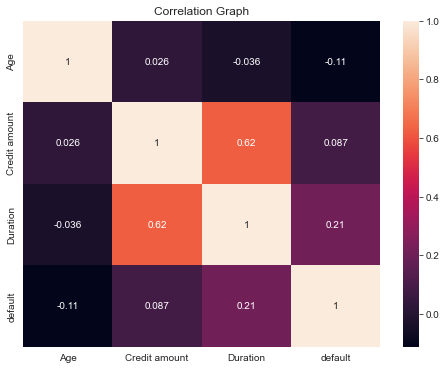

In [45]:
corr = df.corr(method = 'spearman')
plt.figure(figsize=(8, 6))
plt.title("Correlation Graph")
sns.heatmap(corr, annot=True);

As we understand, there is high correlation between 'Credit amount' and 'Duration'.

Note: This data analysis case will be subjected to further updates.